# Intro to Neural Networks Assignment

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: The input layer passes the data directly to the first hidden layer where the data is multiplied by the first hidden layer's weights.

### Hidden Layer: The hidden layers' job is to transform the inputs into something that the output layer can use.

### Output Layer: The output layer transforms the hidden layer activations into whatever scale you wanted your output to be on.

### Neuron: The neuron is nothing more than a set of inputs, a set of weights, and an activation function. The neuron translates these inputs into a single output, which can then be picked up as input for another layer of neurons later on.

### Weight: A weight represent the strength of the connection between units. If the weight from node 1 to node 2 has greater magnitude, it means that neuron 1 has greater influence over neuron 2. A weight brings down the importance of the input value. Weights near zero means changing this input will not change the output. Negative weights mean increasing this input will decrease the output. A weight decides how much influence the input will have on the output.

### Activation Function: squashes the values in a smaller range viz. a Sigmoid activation function squashes values between a range 0 to 1. There are many activation functions used in deep learning industry and ReLU, SeLU and TanH are preferred over sigmoid activation function.

### Node Map: An artificial neural network is an interconnected group of nodes. A node map is neural network topology.

### Perceptron: Perceptron is a single layer neural network and a multi-layer perceptron is called Neural Networks.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

All the inputs x are multiplied with their weights w. 

Add all the multiplied values and call them Weighted Sum. 

Add bias to the weighted sum to improve accuracy.

Apply that weighted sum to the correct Activation Function.



## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import numpy as np

def AND(x1, x2):
    x = np.array([1, x1, x2])
    w = np.array([-1.5, 1, 1])
    y = np.sum(w*x)
    if y <= 0:
        return 0
    else:
        return 1

def OR(x1, x2):
    x = np.array([1, x1, x2])
    w = np.array([-0.5, 1, 1])
    y = np.sum(w*x)
    if y <= 0:
        return 0
    else:
        return 1
      
def NAND(x1, x2):
    x = np.array([1, x1, x2])
    w = np.array([1.5, -1, -1])
    y = np.sum(w*x)
    if y <= 0:
        return 0
    else:
        return 1


input = [(0, 0), (1, 0), (0, 1), (1, 1)]

print("NAND")
for x in input:
    y = NAND(x[0], x[1])
    print(str(x) + " -> " + str(y))
    

NAND
(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv'

df = pd.read_csv(url)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
#df['Outcome'] = df['Outcome'].replace(0,-1)

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df.drop('Outcome', axis=1).values
#X=df[['BMI','DiabetesPedigreeFunction']].values
y = df.Outcome

X.shape, y.shape

((768, 8), (768,))

In [4]:
type(X)

numpy.ndarray

In [0]:
import numpy as np

class Perceptron(object):
  def __init__(self, rate = 0.01, niter = 10):
    self.rate = rate
    self.niter = niter

  def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

    # weights
    self.weight = np.zeros(1 + X.shape[1]).astype(float)

    # Number of misclassifications
    self.errors = []  # Number of misclassifications

    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))
        self.weight[1:] += delta_w * xi
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.weight[1:]) + self.weight[0]
    
  def predict(self, X):
    """Return class label after unit step"""
    #ni = self.net_input(X)
    #print(ni)
    #return np.where(ni >= 0.5, 1, 0)
    return np.where(self.net_input(X) >= 0.5, 1, 0)

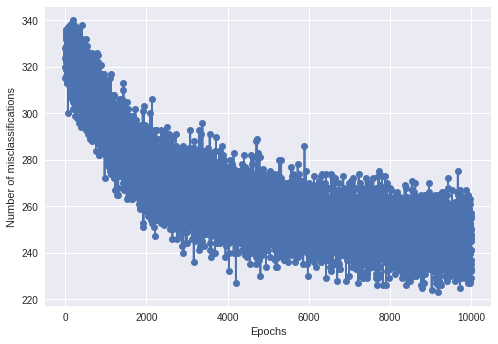

In [11]:
import numpy as np
import matplotlib.pyplot as plt

pn = Perceptron(1, 10000)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?